In [51]:
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/2024-2-data-solution-ch-6-public/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [52]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [53]:
train.head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,0,2,2
96,2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3
97,2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33
98,2011-01-05 07:00:00,1,0,1,1,7.38,9.090,43,12.9980,1,87,88


In [54]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [56]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 데이터 전처리 - 연/월/일/시/분/초 구하기

In [57]:
print(train['datetime'][100]) # datetime 100번째 요소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [58]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split('-')) # "_" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0]) # 연도
print(train['datetime'][100].split()[0].split('-')[1]) # 월
print(train['datetime'][100].split()[0].split('-')[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [59]:
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(':')) # ":" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(':')[0]) # 시간
print(train['datetime'][100].split()[1].split(':')[1]) # 분
print(train['datetime'][100].split()[1].split(':')[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [60]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [61]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [62]:
test['date'] = test['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

test['year'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
test['month'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[1])
test['day'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
test['hour'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[0])
test['minute'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[1])
test['second'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [63]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


## 데이터 전처리 - 날짜 정보로 요일 구하기

In [64]:
from datetime import datetime # datatime 라이브러리 임포트
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) # 문자열로 요일 반환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [65]:
train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [66]:
test['weekday'] = test['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [67]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 데이터 전처리 - 요일 정보 인코딩 -> 알아보기 편하게 바꾸기

In [68]:
train['season_str'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train['weather_str'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

In [69]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,year,month,day,hour,minute,second,weekday,season_str,weather_str
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2011-01-01,2011,01,01,00,00,00,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,2011-01-01,2011,01,01,01,00,00,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,2011-01-01,2011,01,01,02,00,00,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,2011-01-01,2011,01,01,03,00,00,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,2011-01-01,2011,01,01,04,00,00,Saturday,Spring,Clear


## EDA

In [70]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


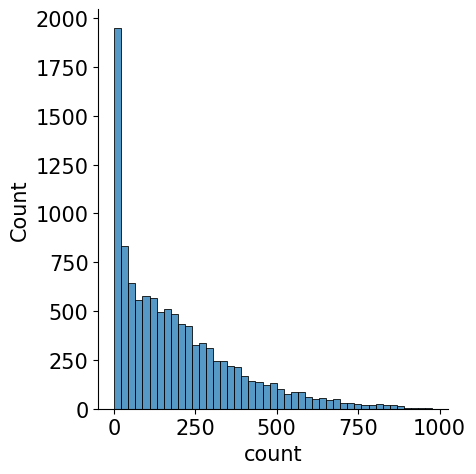

In [71]:
mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 
sns.displot(train['count']); # 분포도 출력

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


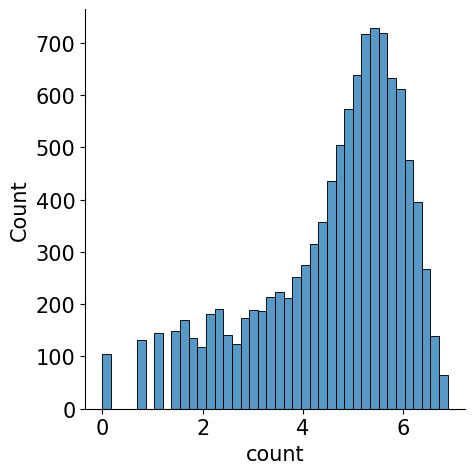

In [72]:
import numpy as np
sns.displot(np.log(train['count']));

## EDA - 막대그래프

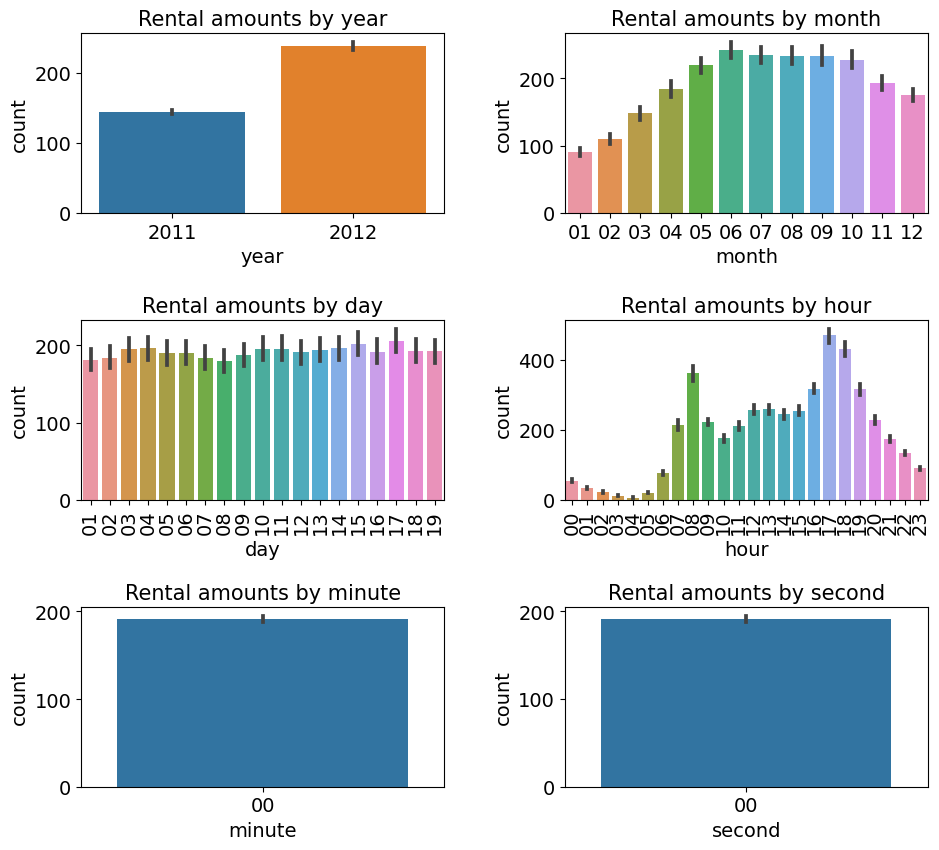

In [73]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

## EDA - 박스플롯

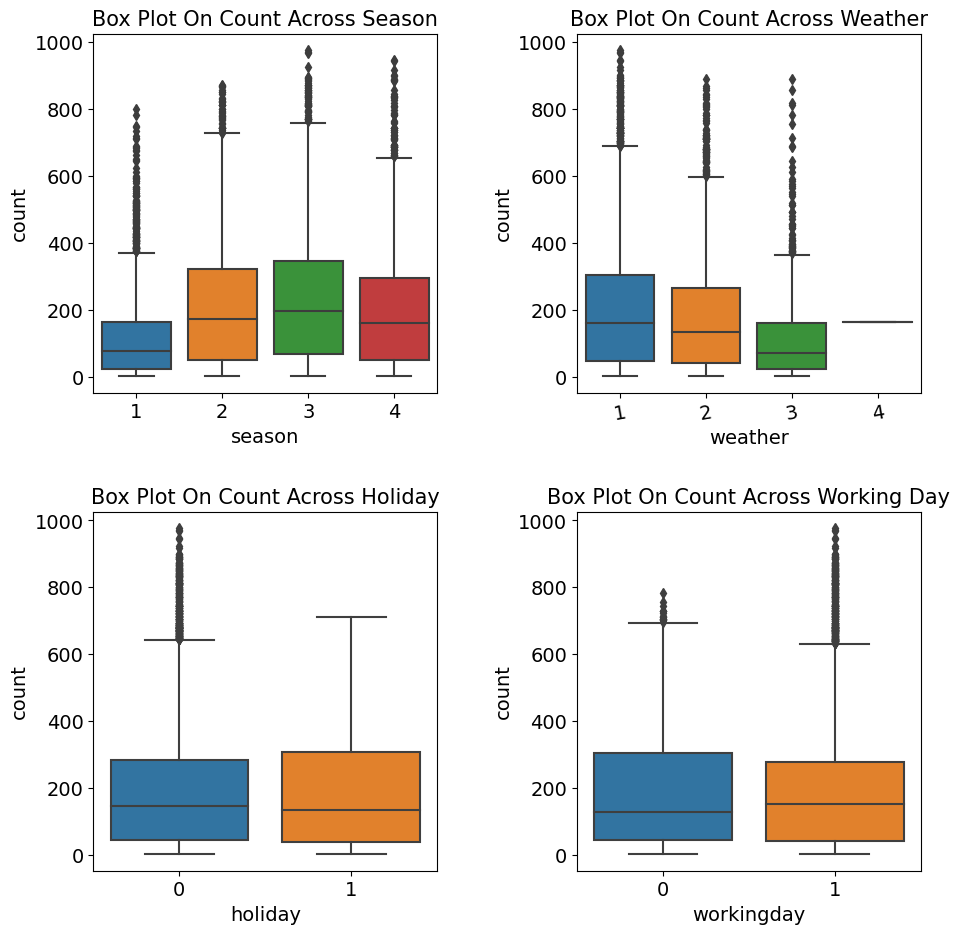

In [28]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

## EDA - 포인트플롯

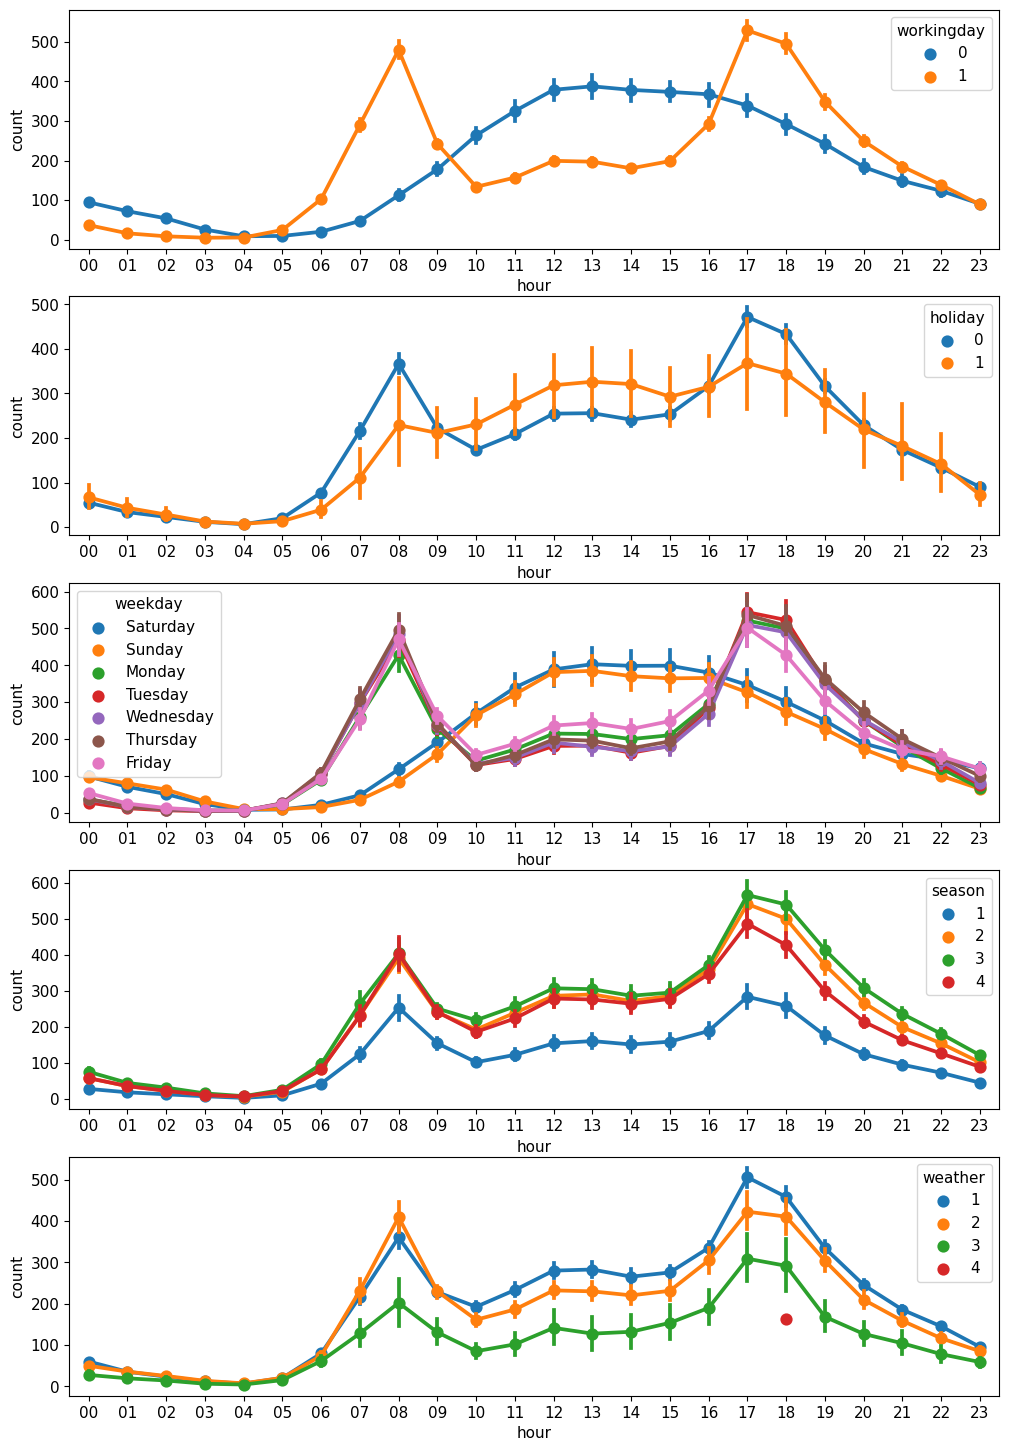

In [29]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

## EDA - 산점도

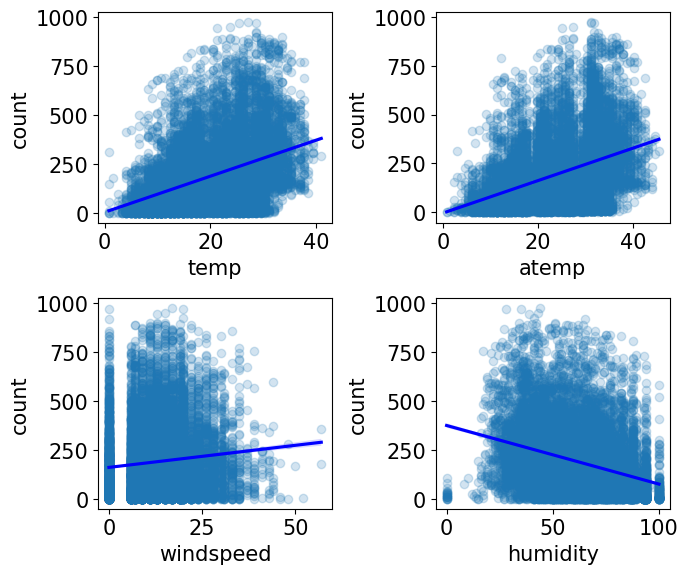

In [30]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

## EDA - 상관관계 매트릭스

In [31]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


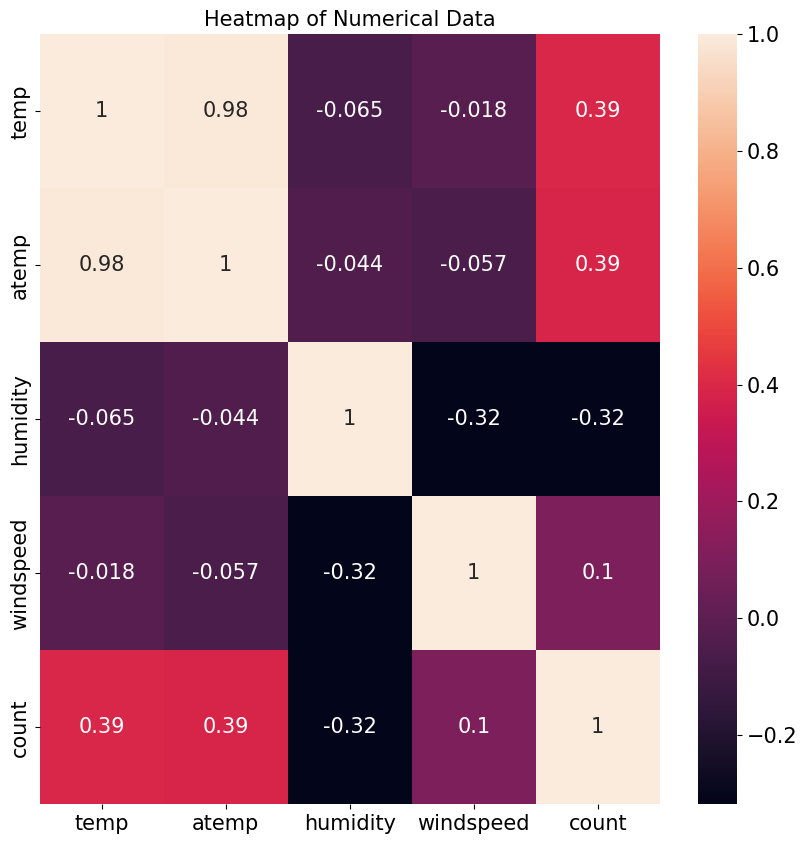

In [32]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

In [38]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,year,month,day,hour,minute,second,weekday,season_str,weather_str
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2011-01-01,2011,01,01,00,00,00,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,2011-01-01,2011,01,01,01,00,00,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,2011-01-01,2011,01,01,02,00,00,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,2011-01-01,2011,01,01,03,00,00,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,2011-01-01,2011,01,01,04,00,00,Saturday,Spring,Clear


## 수업 예시 코드를 바탕으로 나만의 EDA를 진행하라

In [40]:
## Your Code
X_train = train[['season', 'holiday', 'workingday',
                    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
                'month', 'day', 'hour']]
y_train = train['count']
X_test = test[['season', 'holiday', 'workingday',
                    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
                'month', 'day', 'hour']]


## EDA 1

시간의 흐름에대한 수요는 충분히 보았다고 생각하여  
기상조건에대한 수요를 집중해서 보겠습니다.

/tmp/ipykernel_30/2704176252.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train.temp,bins=range(train.temp.min().astype('int'),train.temp.max().astype('int')+1))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/2704176252.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simil

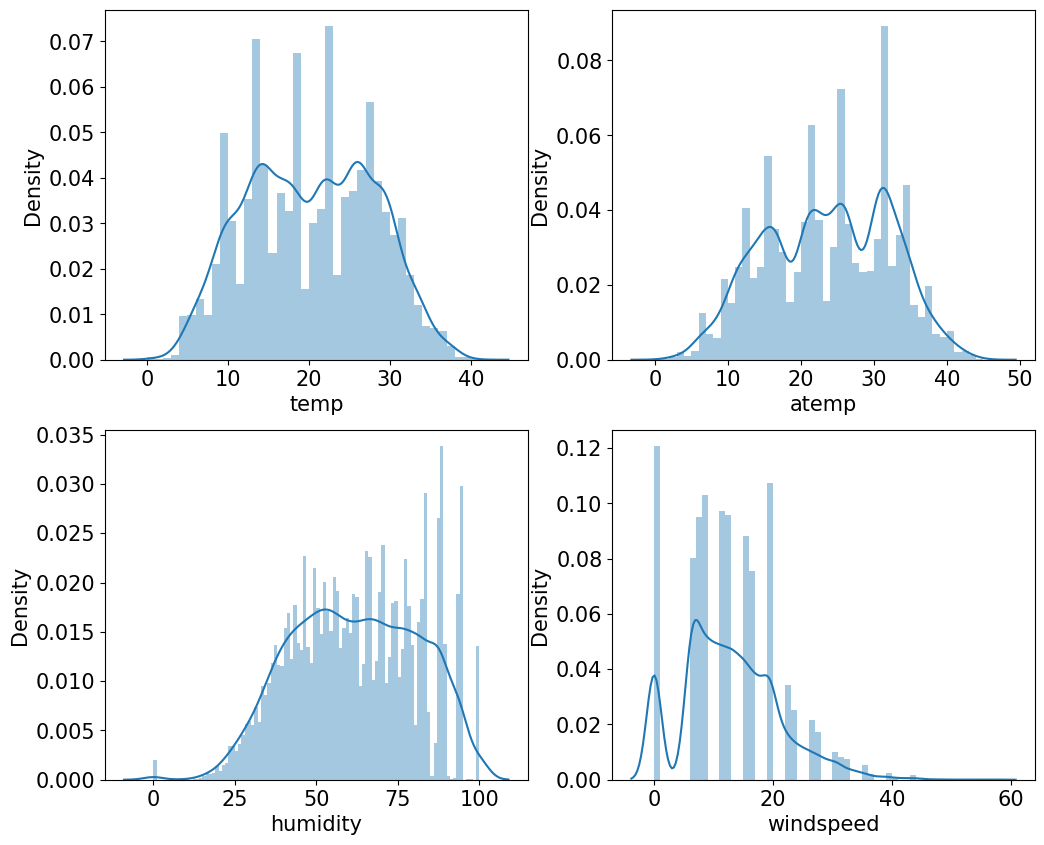

In [41]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(train.temp.min().astype('int'),train.temp.max().astype('int')+1))

#평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(train.atemp.min().astype('int'),train.atemp.max().astype('int')+1))

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity,bins=range(train.humidity.min().astype('int'),train.humidity.max().astype('int')+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed,bins=range(train.windspeed.min().astype('int'),train.windspeed.max().astype('int')+1))

## EDA 2

시간조건들까지 포함하여 상관관계 분석 해보았습니다.

In [74]:
train = train[['season', 'holiday', 'workingday',
                    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
                'month', 'day', 'hour', 'count']]
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count
0,1,0,0,1,9.84,14.395,81,0.0000,01,01,00,16
1,1,0,0,1,9.02,13.635,80,0.0000,01,01,01,40
2,1,0,0,1,9.02,13.635,80,0.0000,01,01,02,32
3,1,0,0,1,9.84,14.395,75,0.0000,01,01,03,13
4,1,0,0,1,9.84,14.395,75,0.0000,01,01,04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,12,19,19,336
10882,4,0,1,1,14.76,17.425,57,15.0013,12,19,20,241
10883,4,0,1,1,13.94,15.910,61,15.0013,12,19,21,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,19,22,129


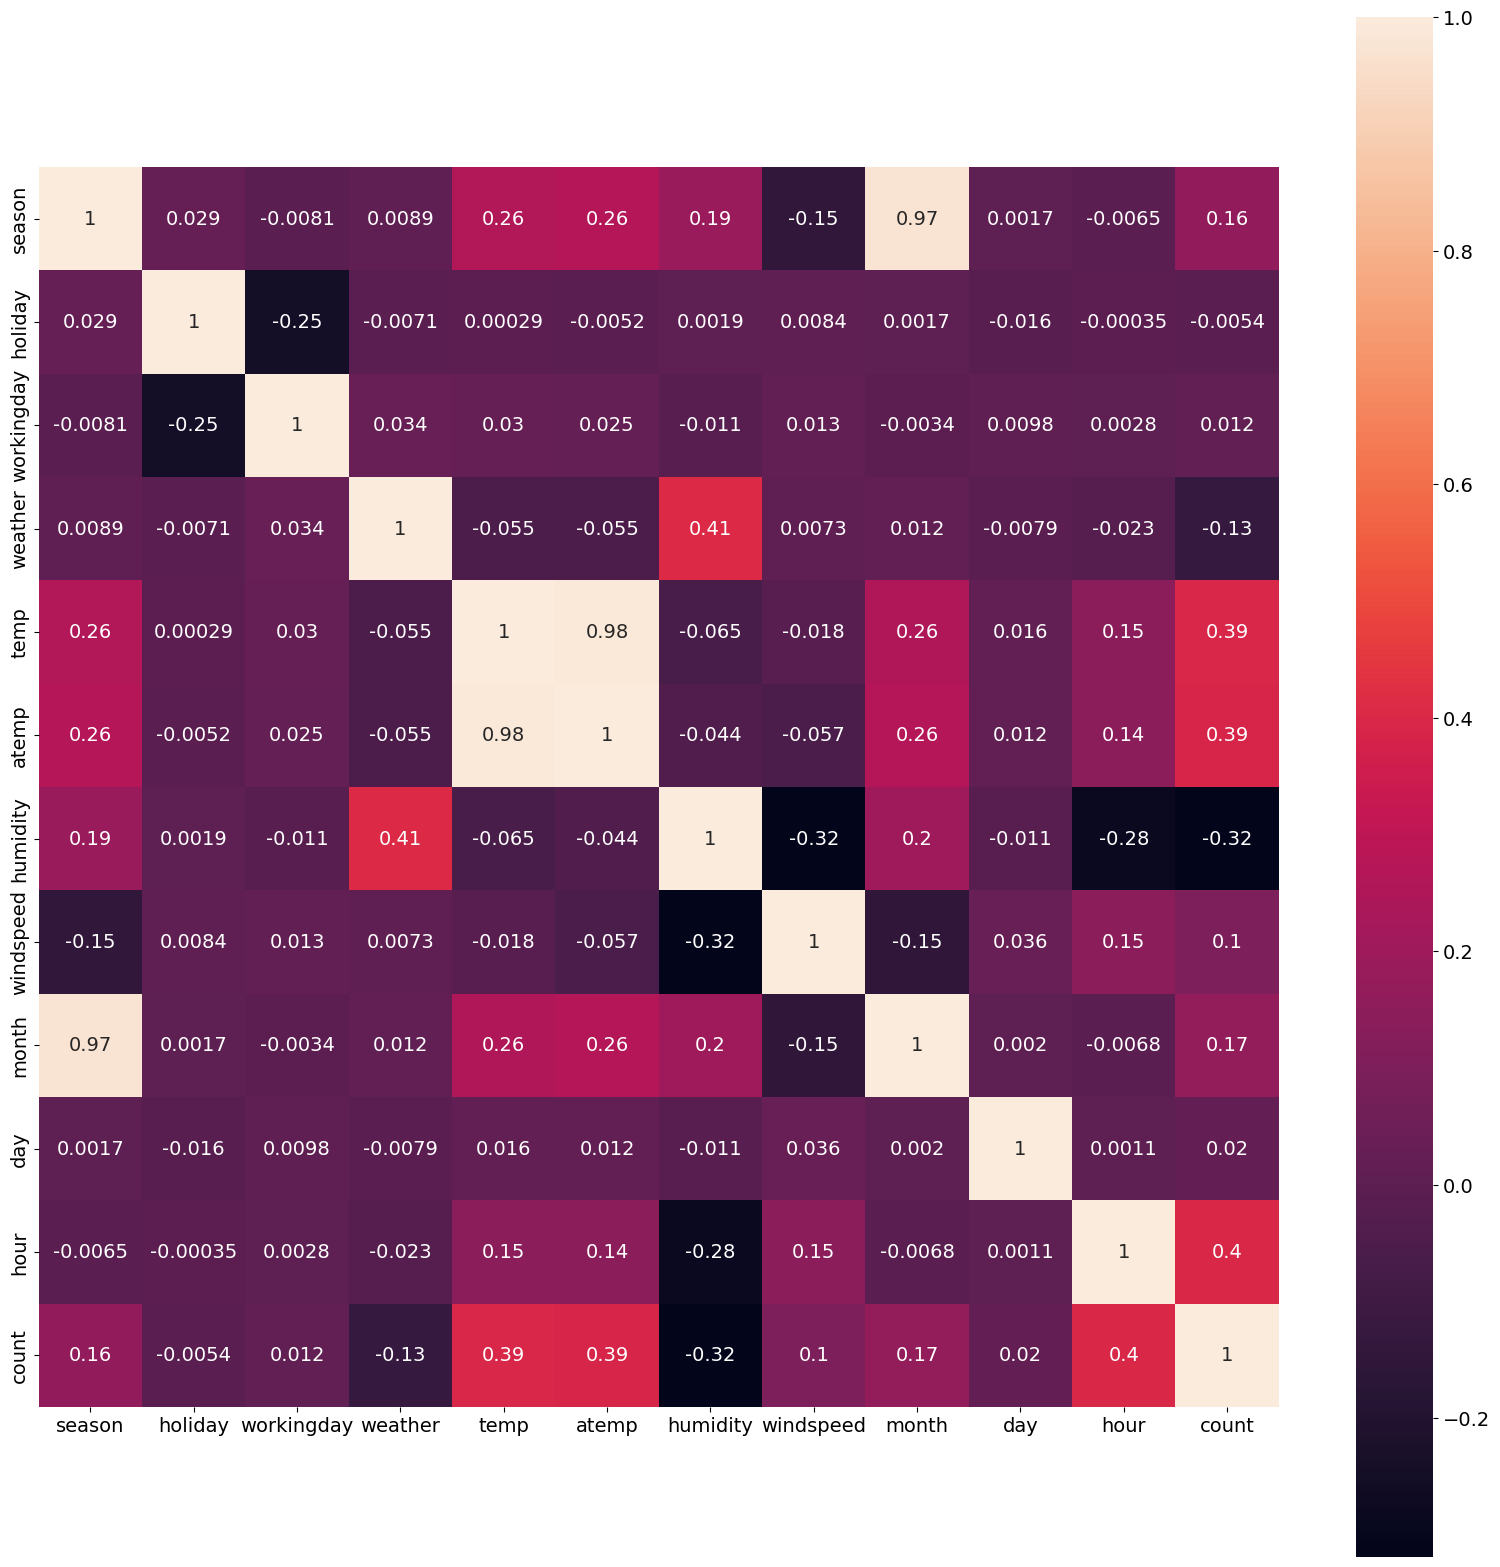

In [75]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)